<a href="https://colab.research.google.com/github/PoonamDighe/ALY6000_MODULE6_FINALPROJECT/blob/master/DIGHE_FINALPROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BANKING DATASET

In [142]:
%matplotlib inline
import matplotlib.pyplot as plt 
plt.rcParams["figure.figsize"]= (12, 7)
import pandas as pd
import numpy as np
import seaborn as sns
import io
import plotly.graph_objects as go
from pandas.plotting import scatter_matrix

In [19]:

from google.colab import files
uploaded = files.upload()



Saving Banking dataset.csv to Banking dataset (1).csv


In [20]:
BANKINGDATASET = pd.read_csv(io.BytesIO(uploaded['Banking dataset.csv']))
BANKINGDATASET

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [22]:
BANKINGDATASET.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [143]:
#checking missing values
BANKINGDATASET.apply(lambda x: sum(x.isnull()),axis=0)

age            0
job            0
marital        0
education      0
default        0
balance        0
housing        0
loan           0
contact        0
day            0
month          0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
Subscribed?    0
dtype: int64

In [24]:
print(BANKINGDATASET.head())

   age           job  marital  education  ... pdays  previous poutcome   y
0   58    management  married   tertiary  ...    -1         0  unknown  no
1   44    technician   single  secondary  ...    -1         0  unknown  no
2   33  entrepreneur  married  secondary  ...    -1         0  unknown  no
3   47   blue-collar  married    unknown  ...    -1         0  unknown  no
4   33       unknown   single    unknown  ...    -1         0  unknown  no

[5 rows x 17 columns]


Text(0, 0.5, 'Count')

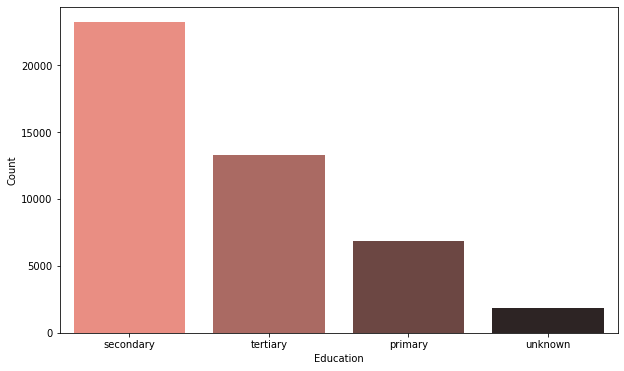

In [29]:
plt.figure(figsize=(10,6))
sns.countplot(x ='education',
              data=BANKINGDATASET,
              order=BANKINGDATASET['education'].value_counts().index,palette='dark:salmon_r')
plt.xlabel('Education')
plt.ylabel('Count')

In [31]:
BANKINGDATASET = BANKINGDATASET.rename(columns={'y':'Subscribed?'})

In [32]:
BANKINGDATASET.dtypes

age             int64
job            object
marital        object
education      object
default        object
balance         int64
housing        object
loan           object
contact        object
day             int64
month          object
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome       object
Subscribed?    object
dtype: object

Text(0.5, 1.0, 'Distribution of subscribed value by education')

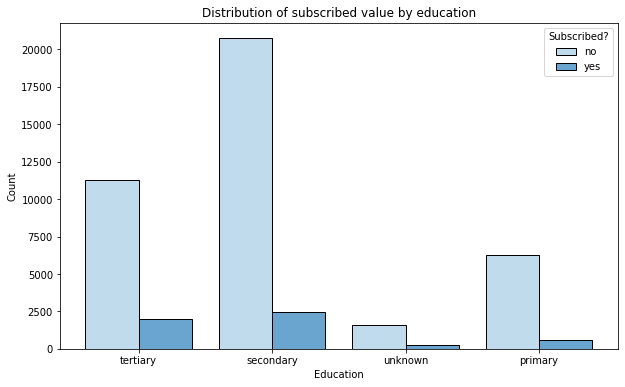

In [33]:
education_target = BANKINGDATASET.groupby('education', as_index=False)['Subscribed?']
plt.figure(figsize=(10,6))
sns.histplot(data=BANKINGDATASET, x="education", hue="Subscribed?", multiple="dodge",binwidth=1.1,shrink=.8,palette='Blues')
plt.xlabel('Education')
plt.title('Distribution of subscribed value by education')

In [37]:
binary_columns = []
for column in BANKINGDATASET.select_dtypes('object').columns:
    if len(BANKINGDATASET[column].unique()) == 2:
        binary_columns.append(column)
    print(f"Column - {column} ",BANKINGDATASET[column].unique(), end='\n\n')

Column - job  ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']

Column - marital  ['married' 'single' 'divorced']

Column - education  ['tertiary' 'secondary' 'unknown' 'primary']

Column - default  ['no' 'yes']

Column - housing  ['yes' 'no']

Column - loan  ['no' 'yes']

Column - contact  ['unknown' 'cellular' 'telephone']

Column - month  ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']

Column - poutcome  ['unknown' 'failure' 'other' 'success']

Column - Subscribed?  ['no' 'yes']



In [38]:
for column in binary_columns:
    BANKINGDATASET[column] = BANKINGDATASET[column].map({'yes': 1, 'no': 0})
    BANKINGDATASET.loc[:, binary_columns]

,default,housing,loan,Subscribed?
0,0,1,0,0
1,0,1,0,0
2,0,1,1,0
3,0,1,0,0
4,0,0,0,0
...,...,...,...,...
45206,0,0,0,1
45207,0,0,0,1
45208,0,0,0,1
45209,0,0,0,0


In [39]:
education_target = BANKINGDATASET.groupby('education', as_index=False)['Subscribed?']
education_target_mean = education_target.mean().sort_values(by='Subscribed?', ascending=False)
education_target_sum = education_target.sum().sort_values(by='Subscribed?', ascending=False)

In [41]:
education_target = BANKINGDATASET.groupby('education', as_index=False)['Subscribed?']
education_target_mean = education_target.mean().sort_values(by='Subscribed?', ascending=False)
education_target_sum = education_target.sum().sort_values(by='Subscribed?', ascending=False)

Text(0.5, 1.0, 'Sum subscribed? value by education')

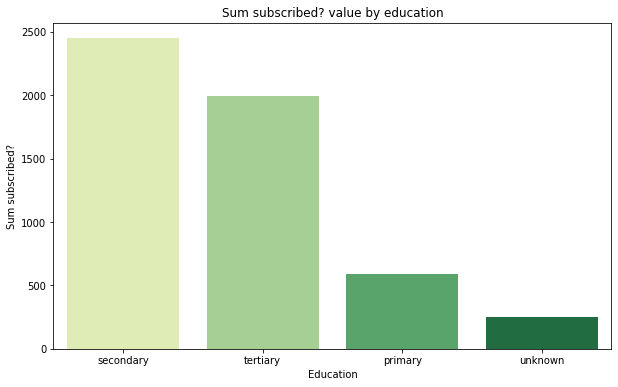

In [141]:
plt.figure(figsize=(10,6))
sns.barplot(data=education_target_sum, x='education', y='Subscribed?',palette='YlGn')
plt.xlabel("Education")
plt.ylabel("Sum subscribed?")
plt.title("Sum subscribed? value by education")

Text(0.5, 0, 'Education')

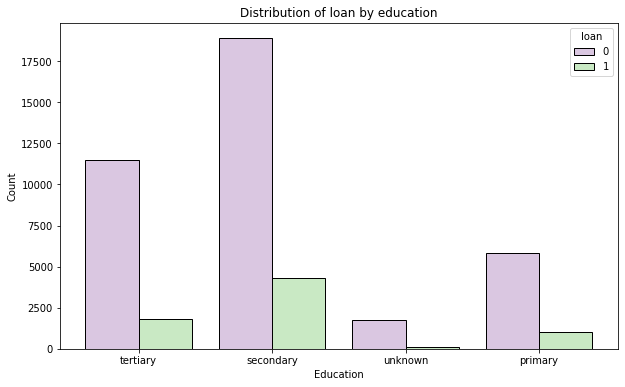

In [45]:
plt.figure(figsize=(10,6))
sns.histplot(data=BANKINGDATASET, x="education", hue="loan", multiple="dodge",binwidth=1.1,shrink=.8,palette='PRGn')
plt.title('Distribution of loan by education')
plt.xlabel('Education')

Text(0.5, 0, 'Education')

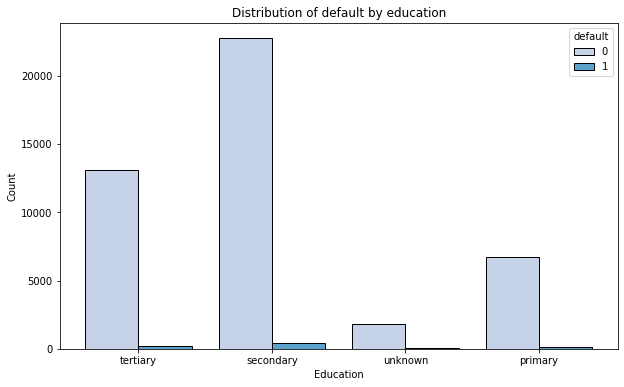

In [49]:
plt.figure(figsize=(10,6))
sns.histplot(data=BANKINGDATASET, x="education", hue="default", multiple="dodge",binwidth=1.1,shrink=.8,palette='PuBu')
plt.title('Distribution of default by education')
plt.xlabel('Education')

In [51]:
education_group = BANKINGDATASET.groupby('education', as_index=False)
education_loan_mean = education_group['loan'].mean().sort_values(by='loan', ascending=False)
education_loan_sum = education_group['loan'].sum().sort_values(by='loan', ascending=False)

education_default_mean = education_group['default'].mean().sort_values(by='default', ascending=False)
education_default_sum = education_group['default'].sum().sort_values(by='default', ascending=False)

education_loan_mean

,education,loan
1,secondary,0.185458
0,primary,0.149467
2,tertiary,0.134125
3,unknown,0.071621


Text(0.5, 1.0, 'Mean subscribed value by education')

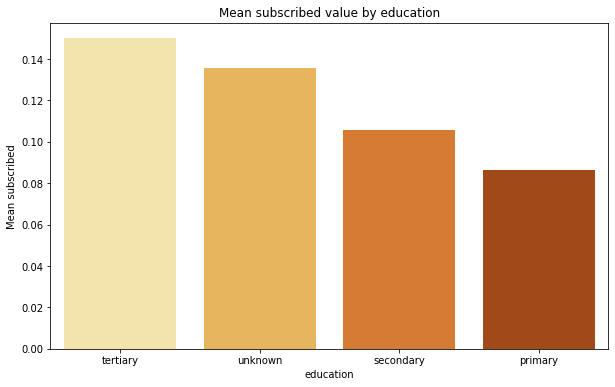

In [59]:
education_target = BANKINGDATASET.groupby('education', as_index=False)['Subscribed?']
education_target_mean = education_target.mean().sort_values(by='Subscribed?', ascending=False)
education_target_sum = education_target.sum().sort_values(by='Subscribed?', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=education_target_mean, x='education', y='Subscribed?',palette='YlOrBr')
plt.xlabel("education")
plt.ylabel("Mean subscribed")
plt.title("Mean subscribed value by education")

Text(0.5, 1.0, 'Mean loan by education')

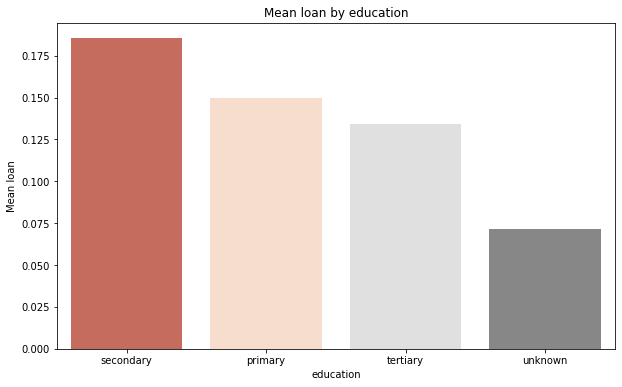

In [52]:
plt.figure(figsize=(10,6))
sns.barplot(data=education_loan_mean, x='education', y='loan',palette='RdGy')
plt.xlabel("education")
plt.ylabel("Mean loan")
plt.title("Mean loan by education")

Text(0.5, 1.0, 'Sum loan by education')

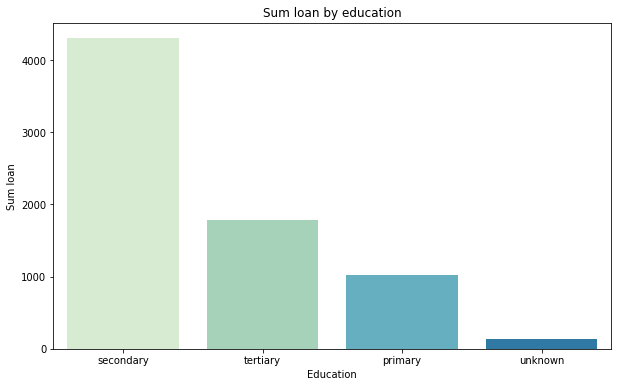

In [53]:
plt.figure(figsize=(10,6))
sns.barplot(data=education_loan_sum, x='education', y='loan',palette='GnBu')
plt.xlabel("Education")
plt.ylabel("Sum loan")
plt.title("Sum loan by education")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

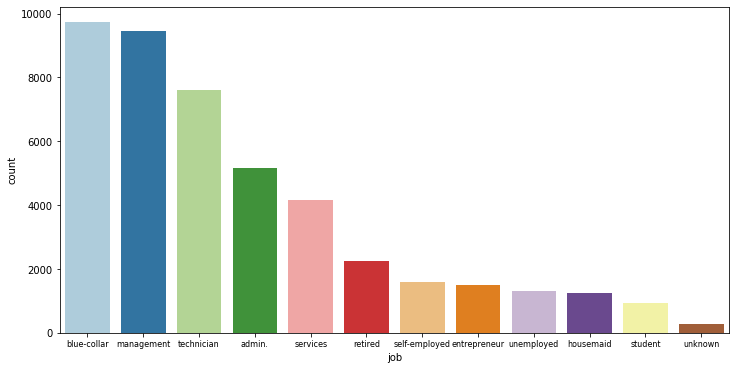

In [54]:
plt.figure(figsize=(12,6))
sns.countplot(x = 'job',
              data = BANKINGDATASET,
              order = BANKINGDATASET['job'].value_counts().index, palette=sns.color_palette('Paired'))
plt.xticks(fontsize='8')

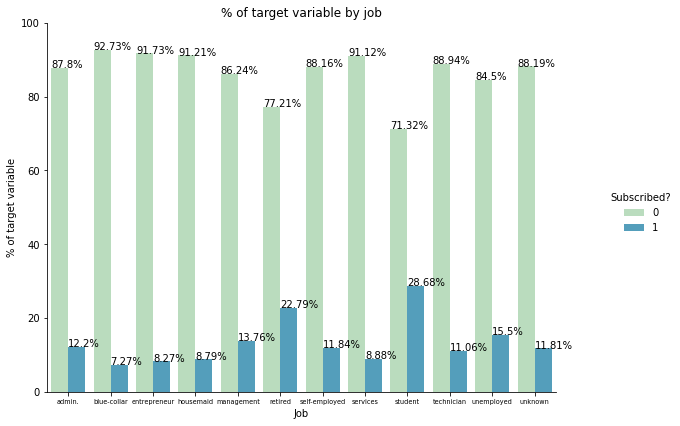

In [57]:
Ejex,Ejey = 'job', 'Subscribed?'

BANKINGDATASET1 = BANKINGDATASET.groupby(Ejex)[Ejey].value_counts(normalize=True)
BANKINGDATASET1 = BANKINGDATASET1.mul(100)
BANKINGDATASET1 = BANKINGDATASET1.rename('percent').reset_index()

g = sns.catplot(x=Ejex,y='percent',hue=Ejey,kind='bar',data=BANKINGDATASET1,palette='GnBu')
g.figure.set_figheight(6)
g.figure.set_figwidth(10)
g.ax.set_ylim(0,100)
g.ax.set_xlabel('Job')
g.ax.set_ylabel('% of target variable')
g.ax.set_title("% of target variable by job")
plt.xticks(fontsize='6.5')
for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

In [60]:
def impute_outliers(df, column , minimum, maximum):
    col_values = BANKINGDATASET[column].values
    df[column] = np.where(np.logical_or(col_values<minimum, col_values>maximum), col_values.mean(), col_values)
    return df

In [61]:
#lets see statistic of Numerical variables before Outlier treatment
BANKINGDATASET.describe()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,Subscribed?
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,0.018027,1362.272058,0.555838,0.160226,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,0.133049,3044.765829,0.496878,0.366820,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,0.000000,-8019.000000,0.000000,0.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,0.000000,72.000000,0.000000,0.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,0.000000,448.000000,1.000000,0.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,0.000000,1428.000000,1.000000,0.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,1.000000,102127.000000,1.000000,1.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


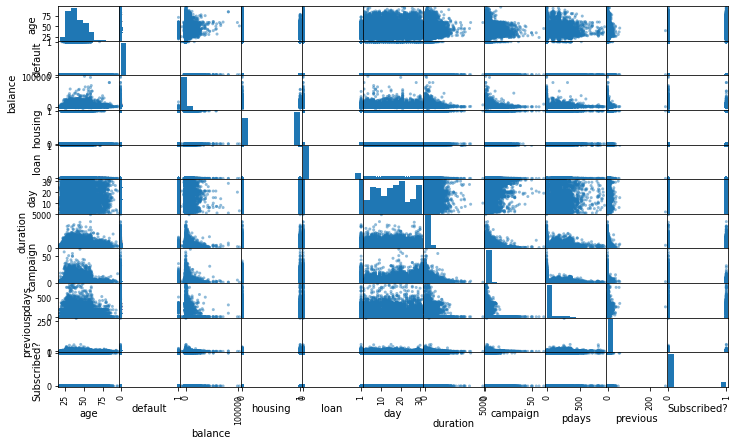

In [73]:
# scatter plot matrix
scatter_matrix(BANKINGDATASET)
plt.show()

Text(0.5, 0, 'is_success')

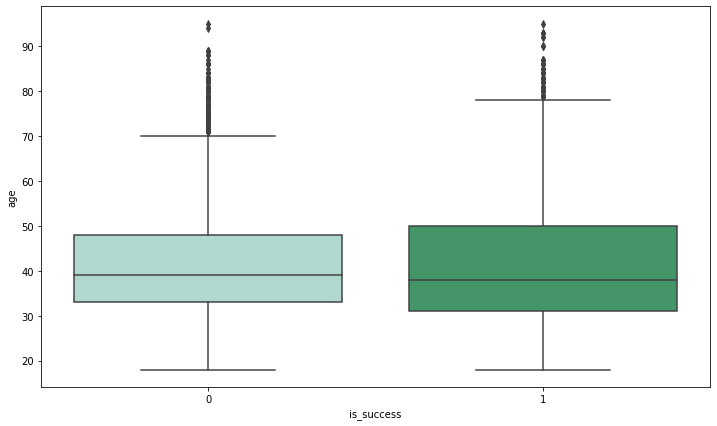

In [140]:
# age
x=sns.boxplot(x='Subscribed?', y='age', data=BANKINGDATASET,palette='BuGn')
x.set_xlabel("is_success")

Text(0.5, 0, 'is_success')

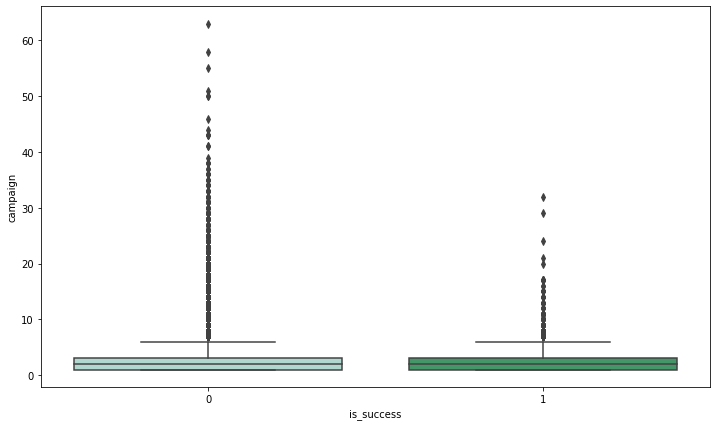

In [121]:
#campaign
x=sns.boxplot(x='Subscribed?', y='campaign', data=BANKINGDATASET, palette='BuGn')
x.set_xlabel("is_success")

Text(0.5, 0, 'is_success')

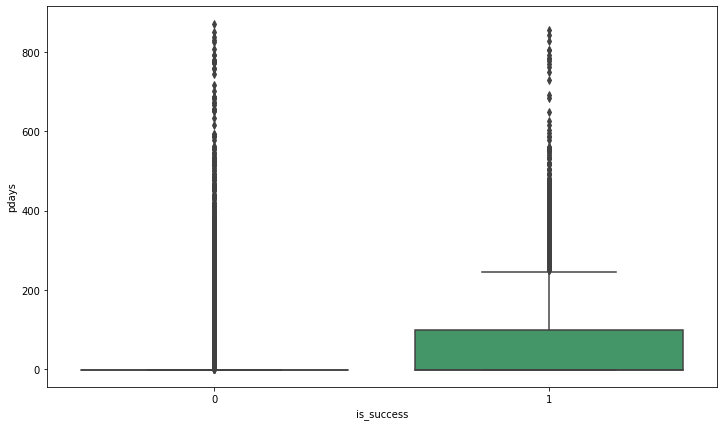

In [122]:
#pdays
x=sns.boxplot(x='Subscribed?', y='pdays', data=BANKINGDATASET,palette='BuGn')
x.set_xlabel("is_success")


Text(0.5, 0, 'is_success')

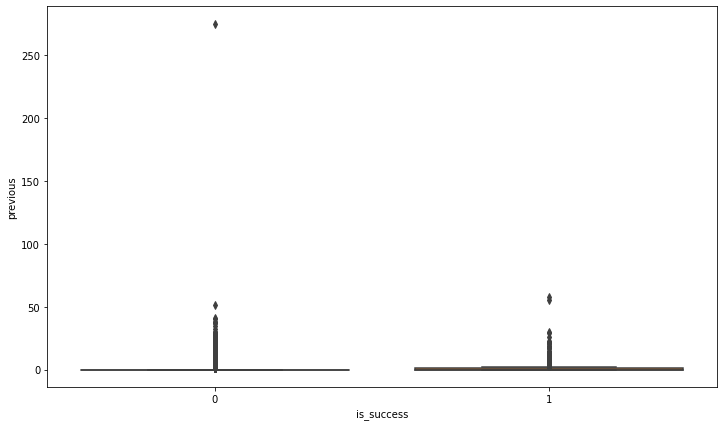

In [94]:
  #previous
x=sns.boxplot(x='Subscribed?', y='previous', data=BANKINGDATASET)
x.set_xlabel("is_success")

marital
divorced    11.517109
married     60.193316
single      28.289576
dtype: float64


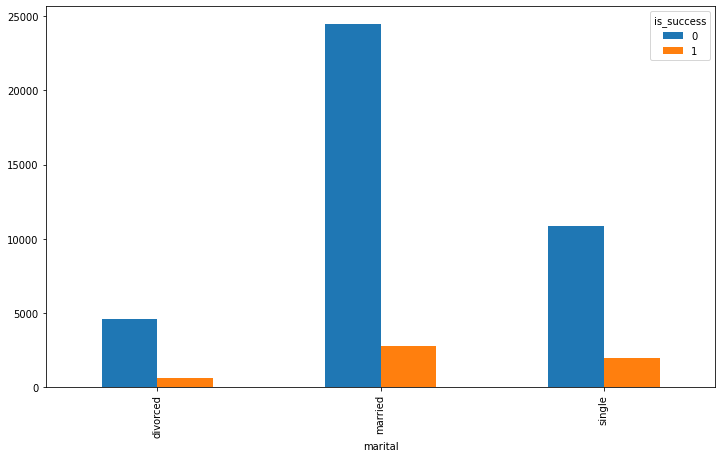

In [144]:
# marital
temp2 = pd.crosstab(BANKINGDATASET['marital'], BANKINGDATASET['Subscribed?'])
temp2.plot(kind='bar')
print(BANKINGDATASET.groupby(['marital']).size()/len(BANKINGDATASET)*100) 
plt.legend(title='is_success')